In [1]:
import pandas as pd

In [2]:
# Load the CSV file into a DataFrame
file_path = 'D://Learning//Sample Data//Copper_Set.xlsx - Result 1.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
data.head(), data.info(), data.describe(include='all')

C:\Users\venka\AppData\Local\Temp\ipykernel_16548\4268340596.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


(                                     id   item_date quantity tons    customer  \
 0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
 1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
 2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
 3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
 4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   
 
    country status item type  application  thickness   width  \
 0     28.0    Won         W         10.0       2.00  1500.0   
 1     25.0    Won         W         41.0       0.80  1210.0   
 2     30.0    Won        WI         28.0       0.38   952.0   
 3     32.0    Won         S         59.0       2.30  1317.0   
 4     28.0    Won         W         10.0       4.00  2000.0   
 
               material_ref  product_ref  delivery date  selling_price  
 0              DEQ1 S460MC   1670798778     20

In [25]:
# id column is unique so we drop the id column
data.drop(columns=['id'],inplace=True)

In [26]:
# Convert columns
# here coerce means while conversion if data is at another data type it raise a value error to overcome this coerce uses it converts them into NaN
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data['material_ref'] = data['material_ref'].fillna('Unknown')

In [46]:
data['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [48]:
# convert categorical data into numerical data - using map and ordinal encoder methods

from sklearn.preprocessing import OrdinalEncoder


data['status'] = data['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
data['item type'] = OrdinalEncoder().fit_transform(data[['item type']])
data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [50]:
data['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [51]:

# find outliers - box plot & skewed data - hist plot and violin plot

from matplotlib import pyplot as plt
import seaborn as sns


def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

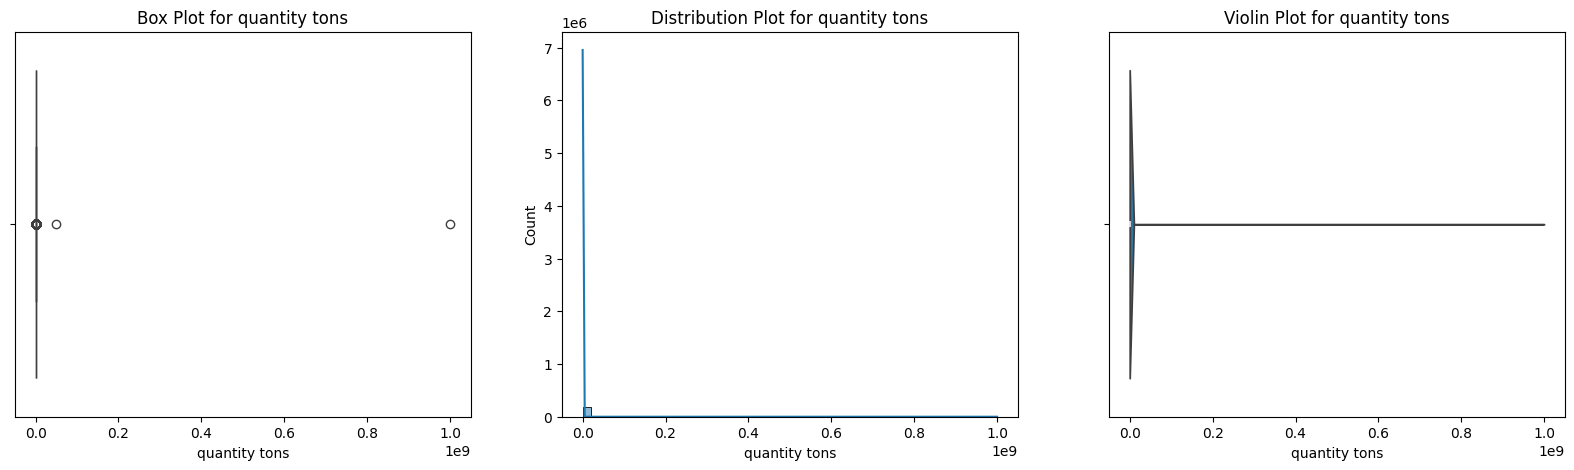

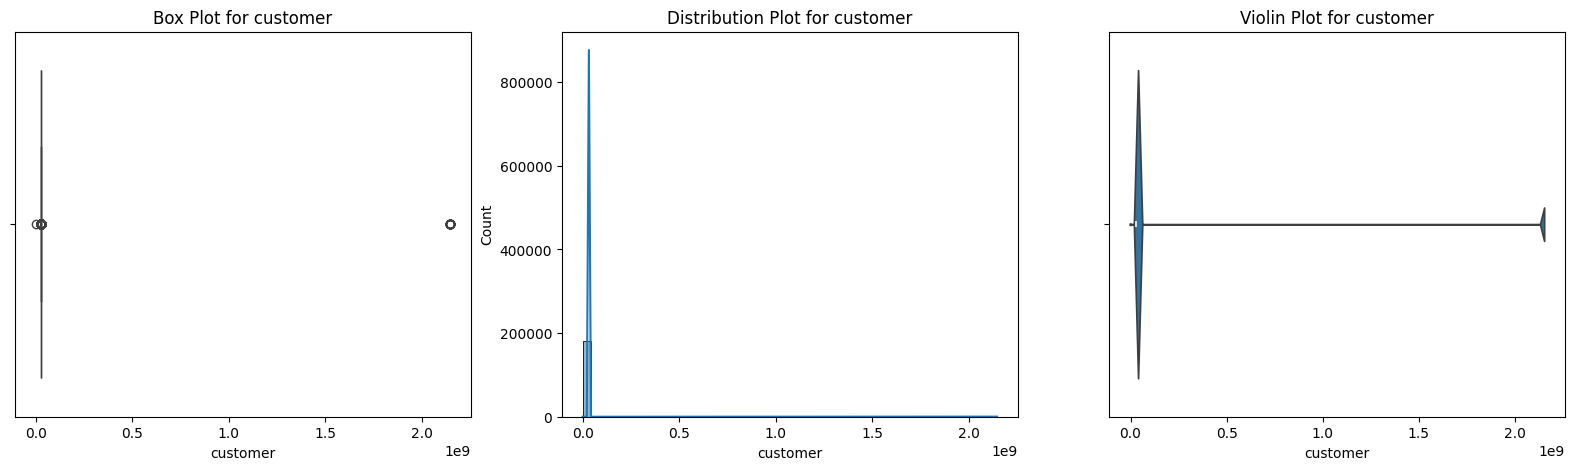

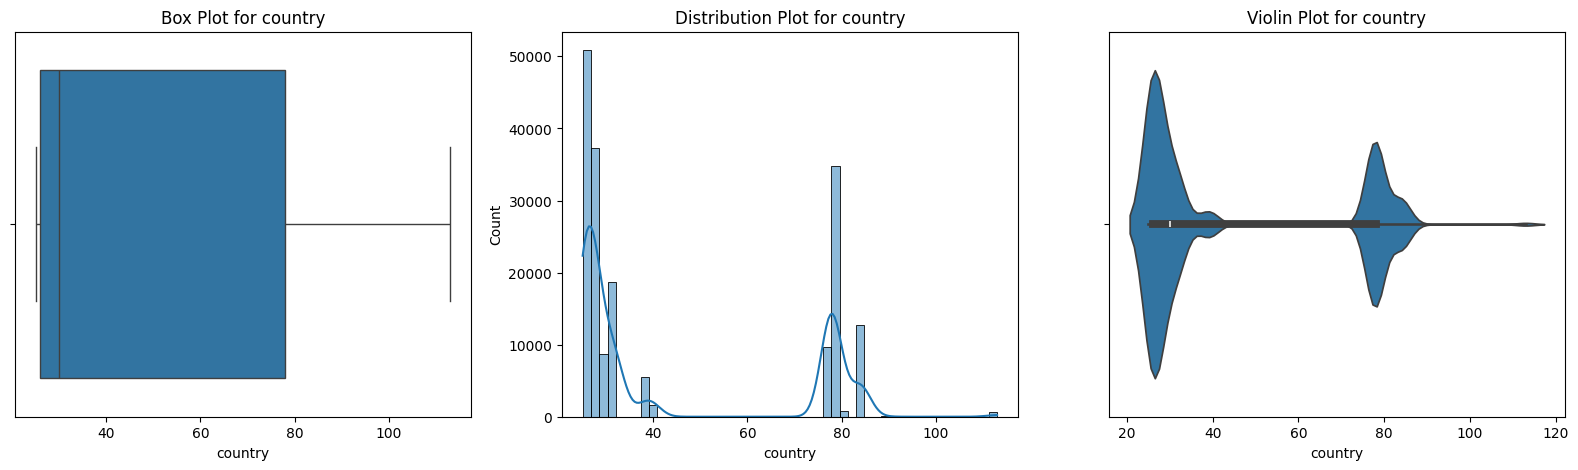

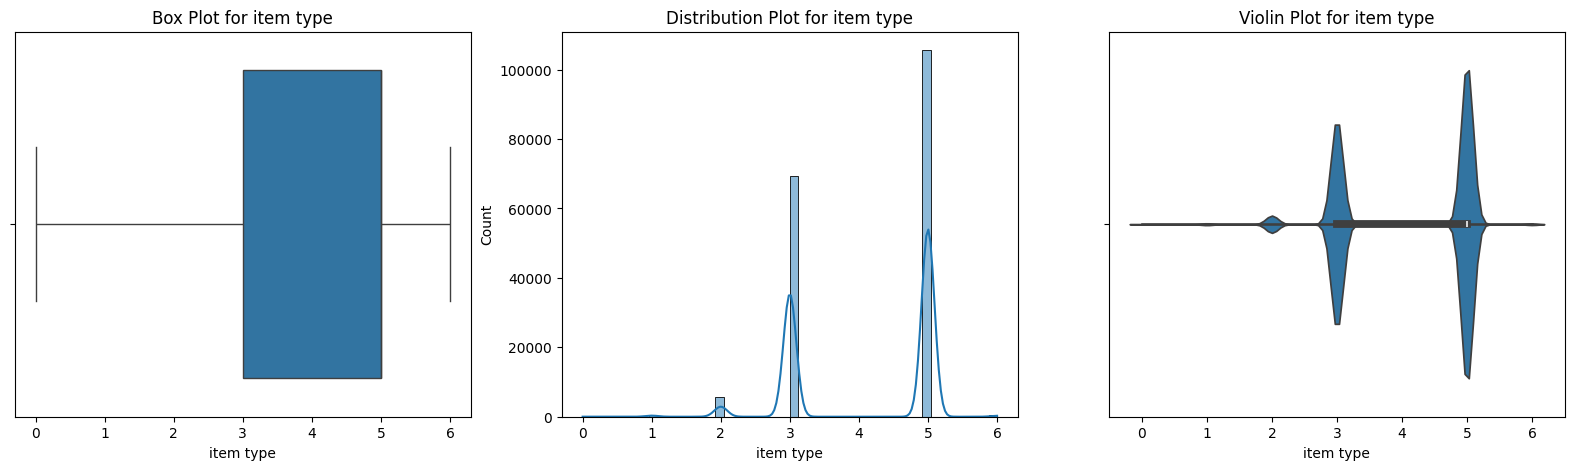

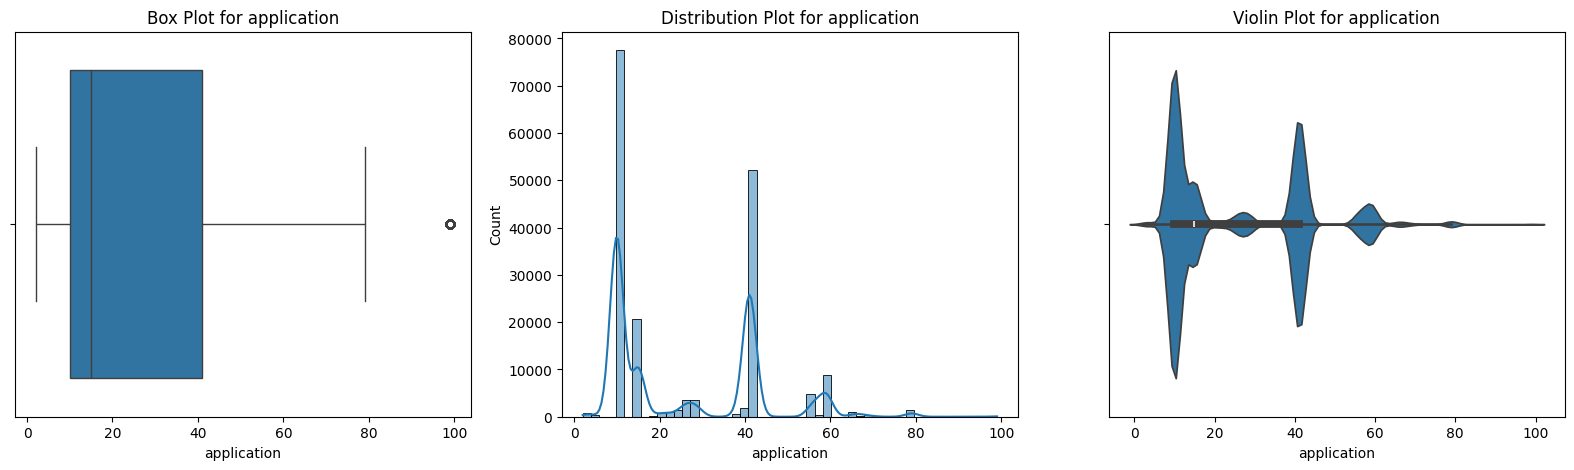

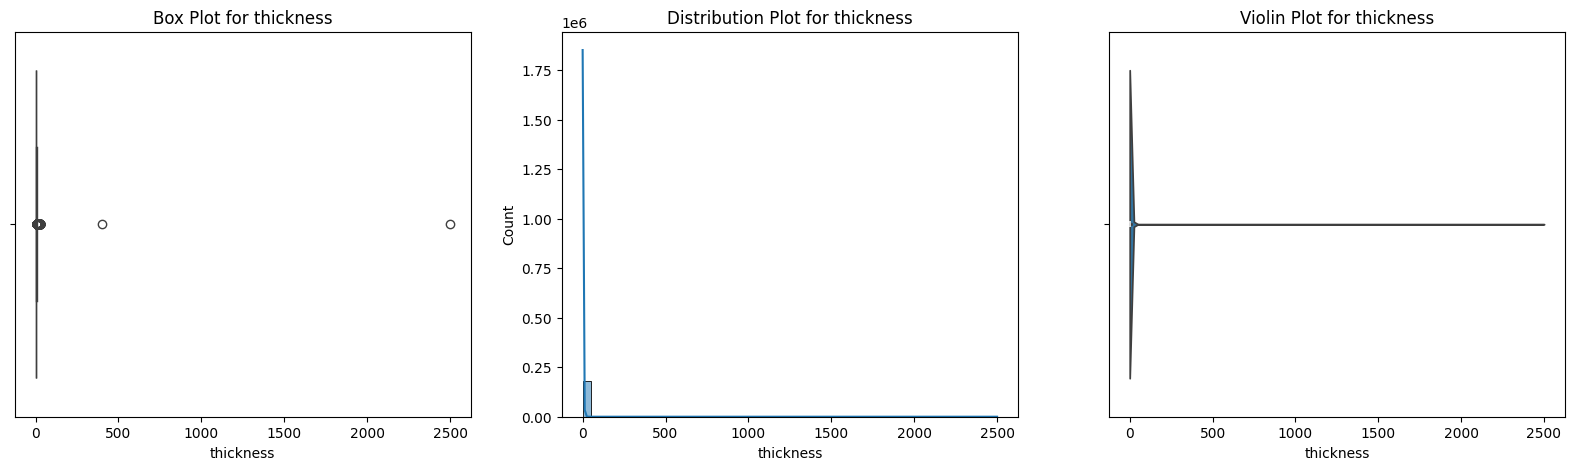

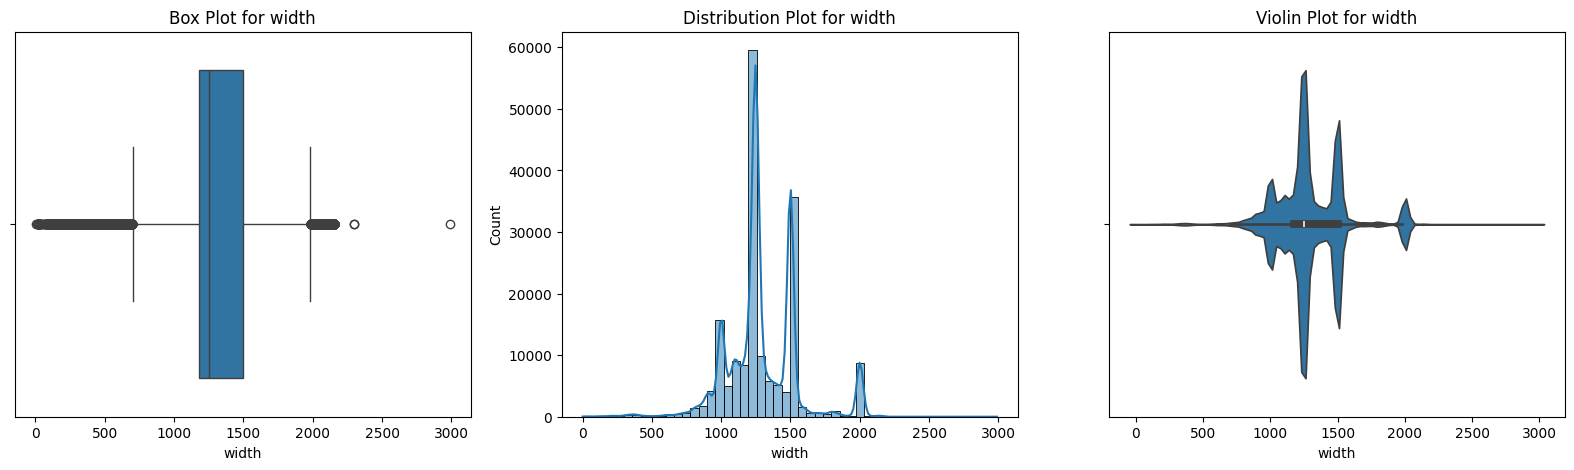

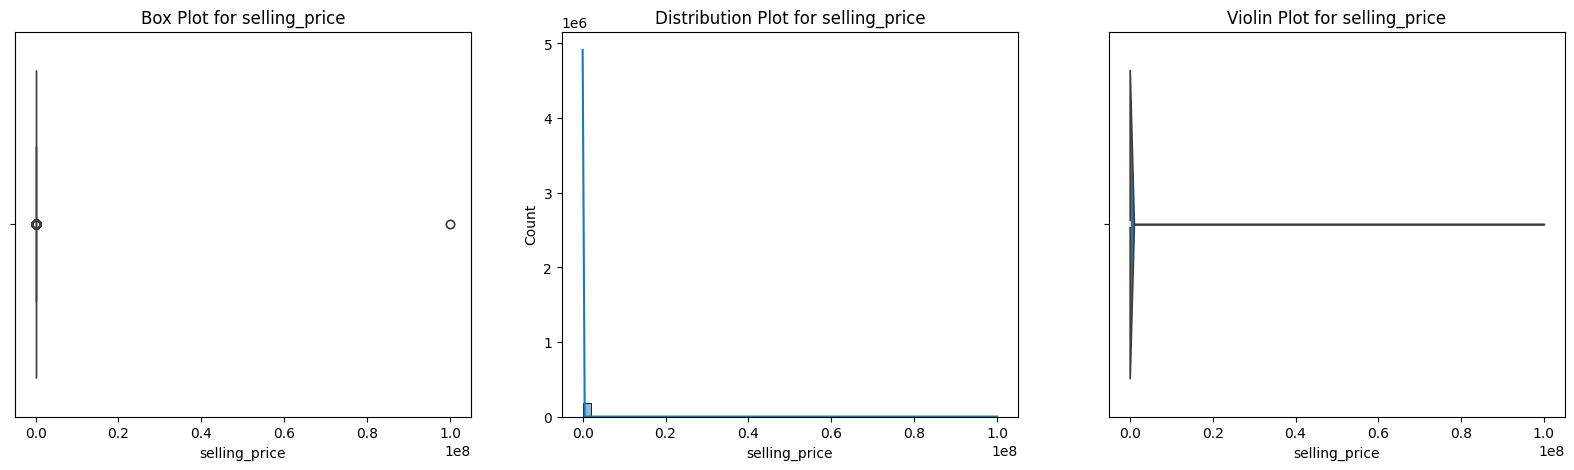

In [52]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(data, i)

In [54]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

import numpy as np


data1 = data.copy()
data1['quantity tons_log'] = np.log(data1['quantity tons'])
data1['thickness_log'] = np.log(data1['thickness'])
data1['selling_price_log'] = np.log(data1['selling_price'])
data1.head(5)

d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Learning\Projects\IndustrialCopperModelling\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1.0,5.0,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


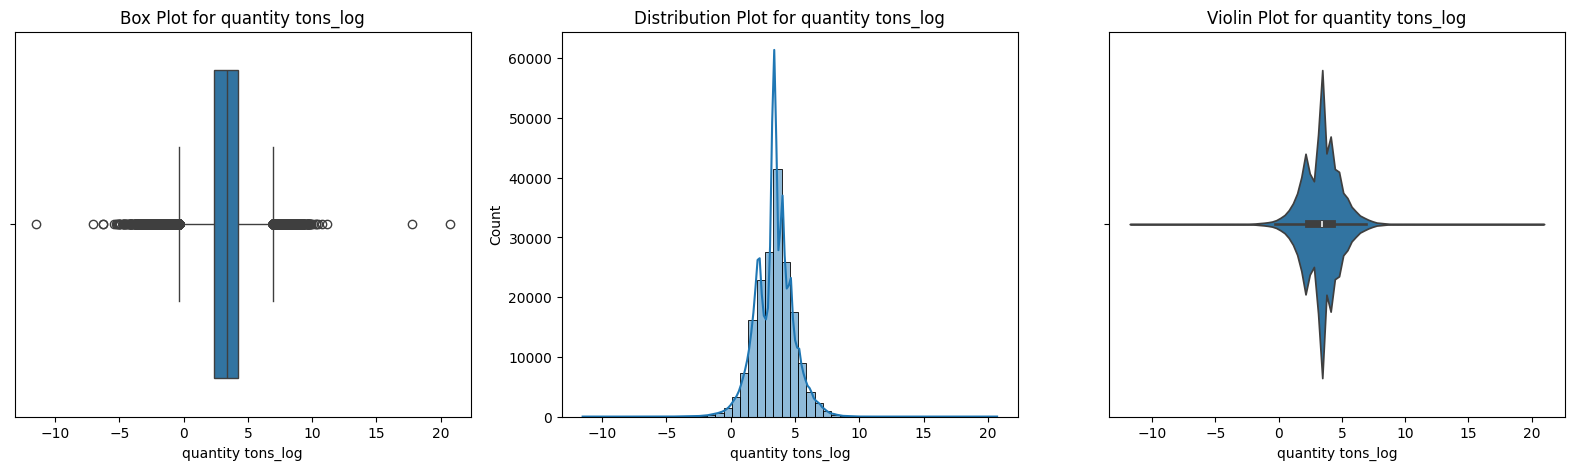

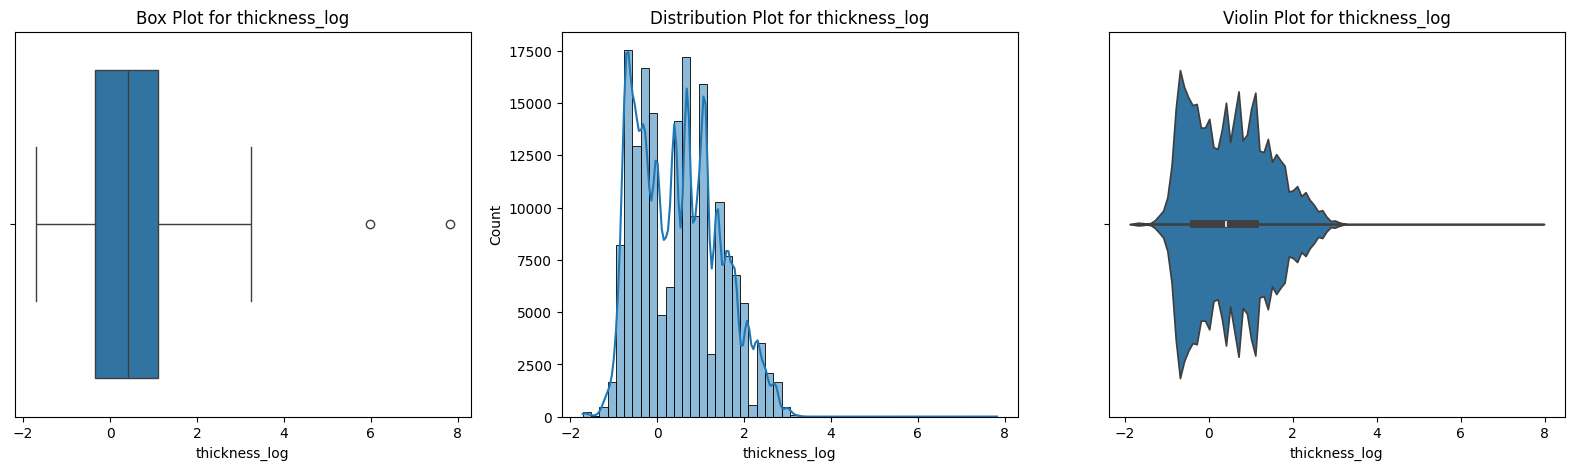

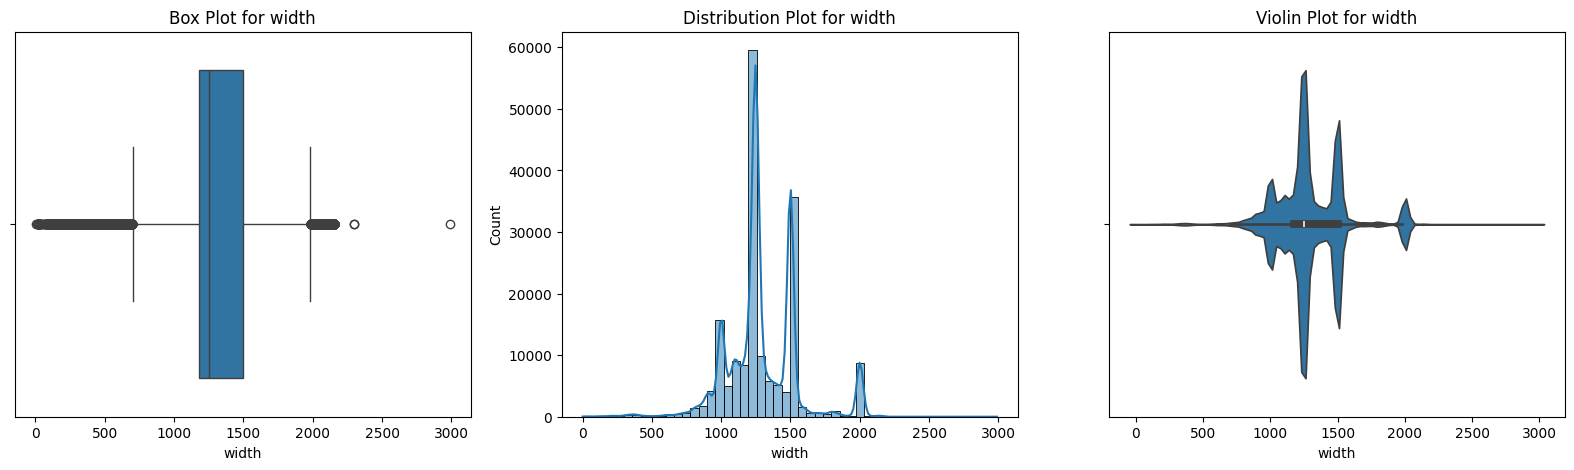

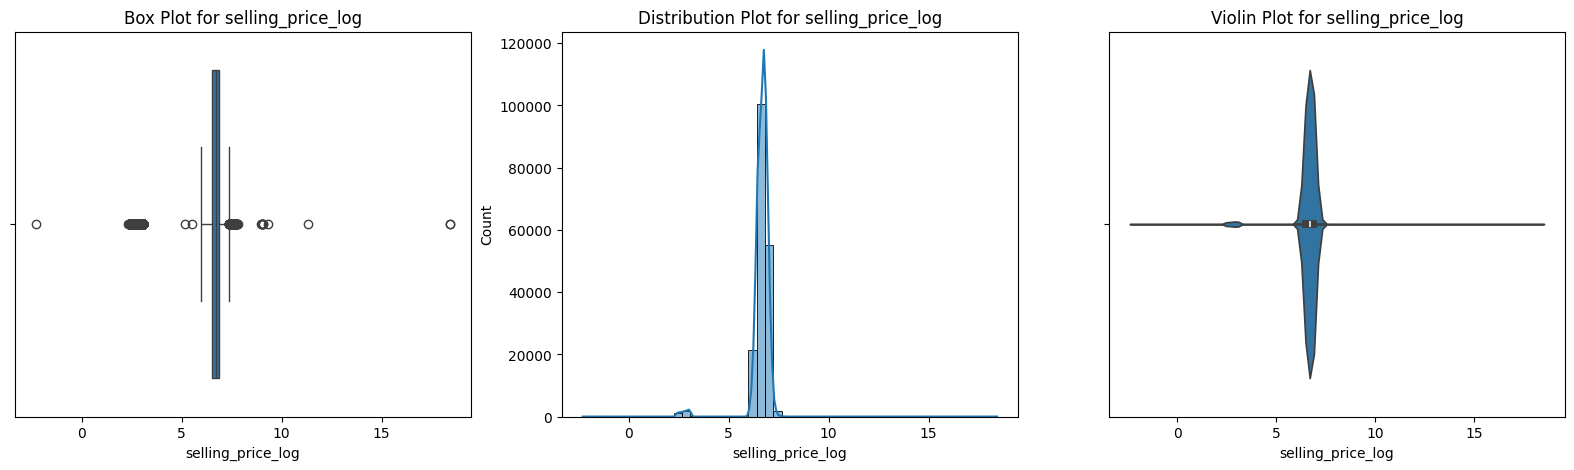

In [56]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(data1, i)

In [57]:
data2 = data1.copy()

In [58]:
data2.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0,6.643822,-0.223144,6.953684


In [59]:

# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [60]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(data2, 'quantity tons_log')
outlier(data2, 'thickness_log')
outlier(data2, 'selling_price_log')
outlier(data2, 'width')
data2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1.0,5.0,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1.0,5.0,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1.0,6.0,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1.0,3.0,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1.0,5.0,10.0,4.00,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


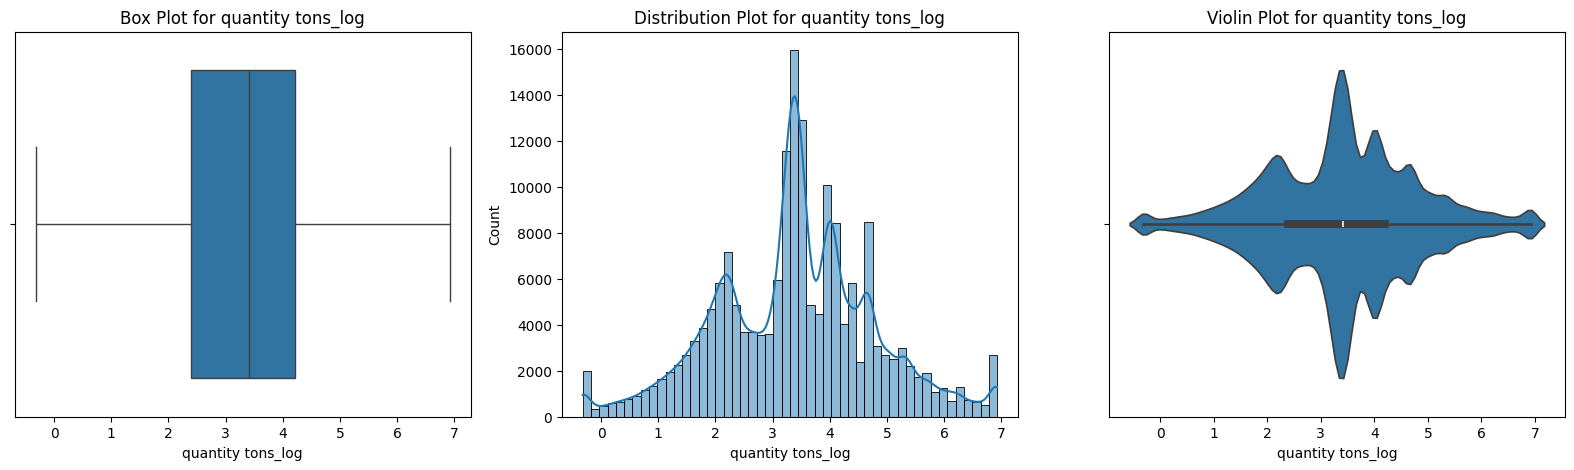

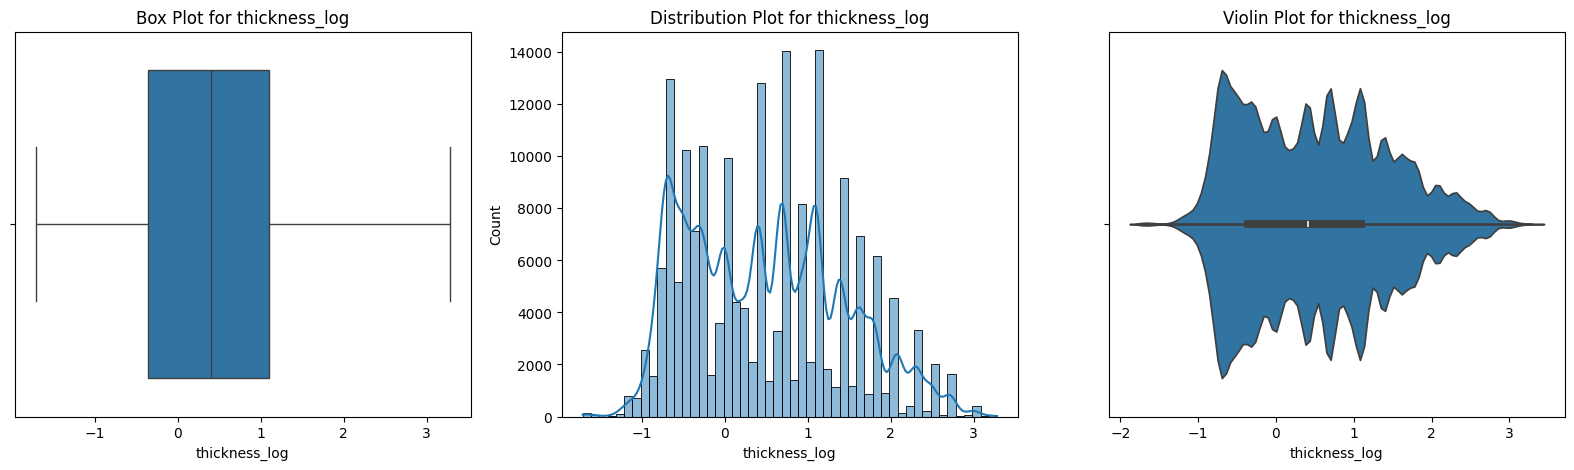

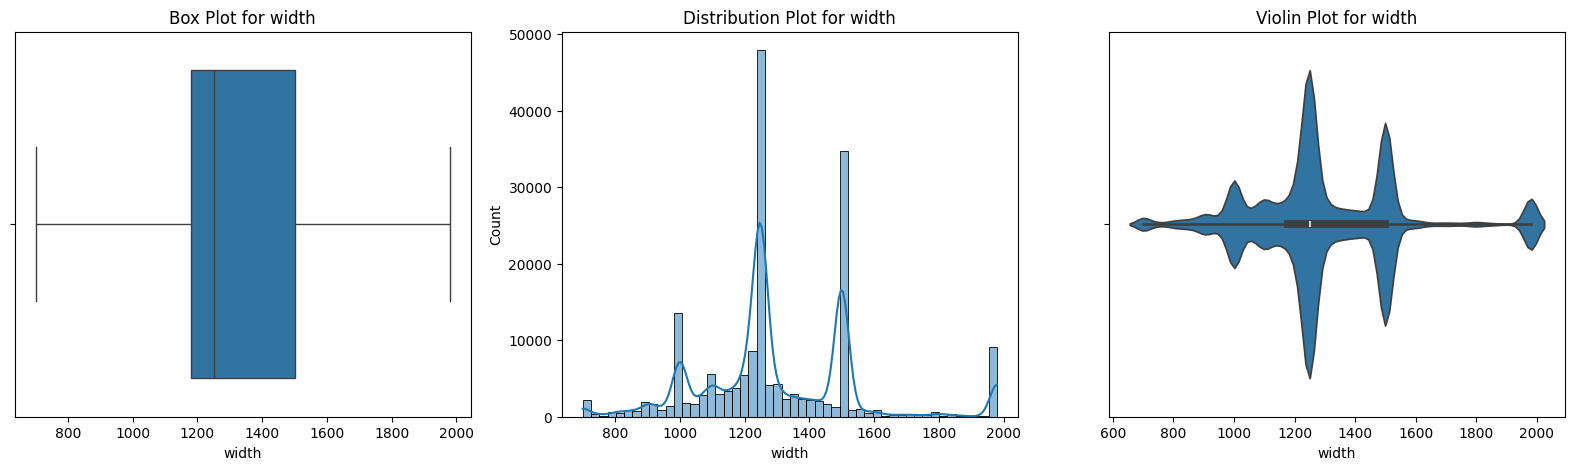

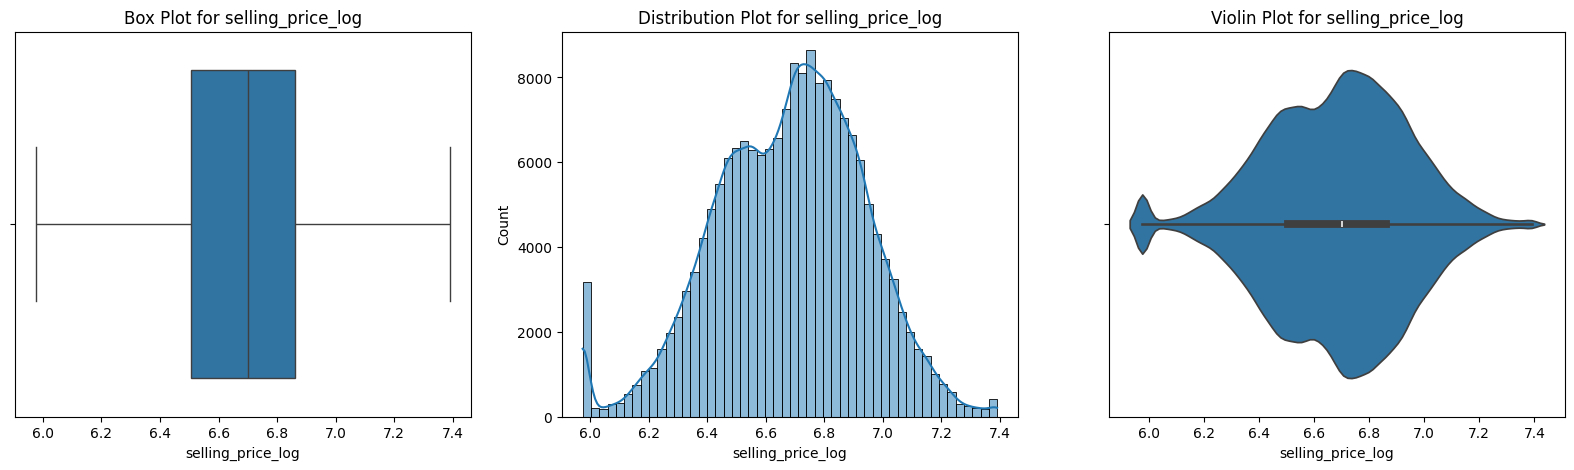

In [61]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(data2, i)

In [62]:
data2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181670,2020-11-26 22:56:58.127374080,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181673.0,5874.925754,-2000.0,10.970374,30.364989,67.161295,1000000000.0,2349074.776494
customer,181672.0,30512209.027968,12458.0,30196884.0,30205242.0,30280416.0,2147483647.0,24333815.584025
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
status,181671.0,1.316688,0.0,1.0,1.0,1.0,8.0,1.330316
item type,181673.0,4.133036,0.0,3.0,5.0,5.0,6.0,1.05523
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1297.045583,700.0,1180.0,1250.0,1500.0,1980.0,248.961933
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402


In [63]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
data3 = data2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
data3.head(5)

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,1.0,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1.0,6.0,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1.0,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1.0,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842


In [64]:
data3.dtypes

item_date            datetime64[ns]
customer                    float64
country                     float64
status                      float64
item type                   float64
application                 float64
width                       float64
material_ref                 object
product_ref                   int64
delivery date        datetime64[ns]
quantity tons_log           float64
thickness_log               float64
selling_price_log           float64
dtype: object

In [65]:
# Select only numeric columns for correlation
numeric_data = data3.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

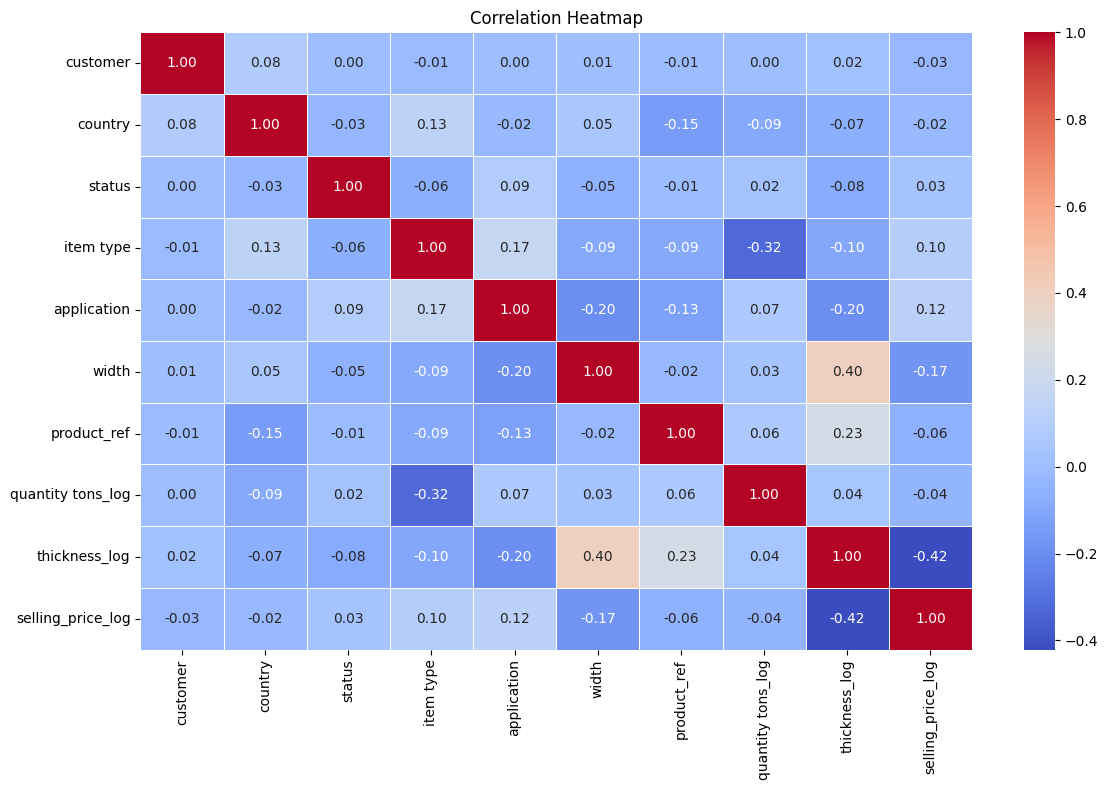

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

Wrong Delivery Date handling

In [67]:
data4 = data3.copy()
data4.head()

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log
0,2021-04-01,30156308.0,28.0,1.0,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931
1,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684
2,2021-04-01,30153963.0,30.0,1.0,6.0,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211
3,2021-04-01,30349574.0,32.0,1.0,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790
4,2021-04-01,30211560.0,28.0,1.0,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842


In [69]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.

# find the difference between item and delivery date and add the new column of dataframe

data4['Date_difference'] = (data4['delivery date'] - data4['item_date']).dt.days
data4.head()
     

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference
0,2021-04-01,30156308.0,28.0,1.0,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91.0
1,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0.0
2,2021-04-01,30153963.0,30.0,1.0,6.0,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90.0
3,2021-04-01,30349574.0,32.0,1.0,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90.0
4,2021-04-01,30211560.0,28.0,1.0,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31.0


In [71]:

# split the day, month, and year from 'item_date_1' column and add dataframe (This data also help us to prediction)
data4['item_date_day'] = data4['item_date'].dt.day
data4['item_date_month'] = data4['item_date'].dt.month
data4['item_date_year'] = data4['item_date'].dt.year
data4.head()

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,1.0,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
2,2021-04-01,30153963.0,30.0,1.0,6.0,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90.0,1.0,4.0,2021.0
3,2021-04-01,30349574.0,32.0,1.0,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90.0,1.0,4.0,2021.0
4,2021-04-01,30211560.0,28.0,1.0,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31.0,1.0,4.0,2021.0


In [72]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = data4[data4['Date_difference']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30156308.0,28.0,1.0,5.0,10.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,3.991779,0.693147,6.749931,91.0,1.0,4.0,2021.0
1,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1210.0,104991,1668701718,2021-04-01,6.643822,-0.223144,6.953684,0.0,1.0,4.0,2021.0
2,2021-04-01,30202938.0,25.0,1.0,5.0,41.0,1265.0,102325,1668701718,2021-04-01,5.419608,0.405465,6.890609,0.0,1.0,4.0,2021.0
3,2021-04-01,30209509.0,30.0,2.0,5.0,41.0,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,1.259203,-0.967584,5.975038,91.0,1.0,4.0,2021.0
4,2021-04-01,30341428.0,38.0,1.0,3.0,10.0,1275.0,106786,1668701376,2021-07-01,4.235147,-0.510826,7.217443,91.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165555,2020-07-02,30227718.0,25.0,0.0,3.0,15.0,1980.0,Unknown,640665,2020-08-01,3.472467,1.791759,6.313548,30.0,2.0,7.0,2020.0
165556,2020-07-02,30161559.0,30.0,0.0,3.0,10.0,1525.0,Unknown,640665,2020-08-01,4.196171,1.348073,6.126869,30.0,2.0,7.0,2020.0
165557,2020-07-02,30161559.0,30.0,0.0,3.0,10.0,1525.0,Unknown,640665,2020-08-01,4.156686,1.766442,6.124683,30.0,2.0,7.0,2020.0
165558,2020-07-02,30161559.0,30.0,0.0,3.0,10.0,1500.0,Unknown,640665,2020-08-01,4.025862,2.060514,6.126869,30.0,2.0,7.0,2020.0


In [73]:
# split the negative value of 'Date_difference' column in another dataframe
df_f2 = data4[data4['Date_difference']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

,item_date,customer,country,status,item type,application,width,material_ref,product_ref,delivery date,quantity tons_log,thickness_log,selling_price_log,Date_difference,item_date_day,item_date_month,item_date_year
0,2021-04-01,30153963.0,30.0,1.0,6.0,28.0,952.0,S0380700,628377,2021-01-01,5.956169,-0.967584,6.468211,-90.0,1.0,4.0,2021.0
1,2021-04-01,30349574.0,32.0,1.0,3.0,59.0,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,5.310301,0.832909,6.643790,-90.0,1.0,4.0,2021.0
2,2021-04-01,30211560.0,28.0,1.0,5.0,10.0,1980.0,2_S275JR+AR-CL1,640665,2021-03-01,6.666354,1.386294,6.357842,-31.0,1.0,4.0,2021.0
3,2021-04-01,30342192.0,32.0,1.0,5.0,41.0,1220.0,1000944,611993,2021-01-01,4.730808,-0.385662,6.836259,-90.0,1.0,4.0,2021.0
4,2021-04-01,30342192.0,32.0,1.0,5.0,41.0,1220.0,1000063,611993,2021-01-01,4.736160,-0.597837,6.860664,-90.0,1.0,4.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16102,2020-07-02,30200854.0,25.0,1.0,5.0,41.0,1220.0,1000777,164141591,2020-07-01,4.629691,-0.040822,6.381816,-1.0,2.0,7.0,2020.0
16103,2020-07-02,30200854.0,25.0,1.0,5.0,41.0,1500.0,1000227,164141591,2020-07-01,5.337954,-0.051293,6.378426,-1.0,2.0,7.0,2020.0
16104,2020-07-02,30200854.0,25.0,1.0,5.0,41.0,1250.0,1004216,164141591,2020-07-01,1.443523,-0.342490,6.428105,-1.0,2.0,7.0,2020.0
16105,2020-07-02,30200854.0,25.0,1.0,5.0,41.0,1250.0,1001149,164141591,2020-07-01,NaN,-0.162519,6.398595,-1.0,2.0,7.0,2020.0


In [47]:

data['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [27]:
from sklearn.impute import SimpleImputer
# Impute missing values in numerical columns with mean
imputer = SimpleImputer(strategy='mean')
data['quantity tons'] = imputer.fit_transform(data[['quantity tons']])

In [28]:
# Drop rows with any remaining missing values
data_cleaned = data.dropna()

In [29]:
# Display cleaned data
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 181634 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181634 non-null  datetime64[ns]
 1   quantity tons  181634 non-null  float64       
 2   customer       181634 non-null  float64       
 3   country        181634 non-null  float64       
 4   status         181634 non-null  object        
 5   item type      181634 non-null  object        
 6   application    181634 non-null  float64       
 7   thickness      181634 non-null  float64       
 8   width          181634 non-null  float64       
 9   material_ref   181634 non-null  object        
 10  product_ref    181634 non-null  int64         
 11  delivery date  181634 non-null  datetime64[ns]
 12  selling_price  181634 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 19.4+ MB
None


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Descriptive Statistics
numerical_summary = data_cleaned.describe()

In [32]:
numerical_summary

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,181634,1.816340e+05,1.816340e+05,181634.000000,181634.000000,181634.000000,181634.000000,1.816340e+05,181634,1.816340e+05
mean,2020-11-26 23:02:14.181926400,5.876167e+03,3.023250e+07,44.893192,25.616157,2.564178,1295.262060,4.740329e+08,2021-01-25 22:48:26.495480064,1.918348e+03
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.096831e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.250000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036327e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716208e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349327e+06,1.005620e+05,24.404293,17.753921,6.572586,261.644942,7.175387e+08,NaN,3.318303e+05


In [33]:

# Categorical Analysis
categorical_summary = data_cleaned.select_dtypes(include=['object']).describe()

In [34]:
categorical_summary

,status,item type,material_ref
count,181634,181634,181634
unique,9,7,16411
top,Won,W,Unknown
freq,116006,105610,77884


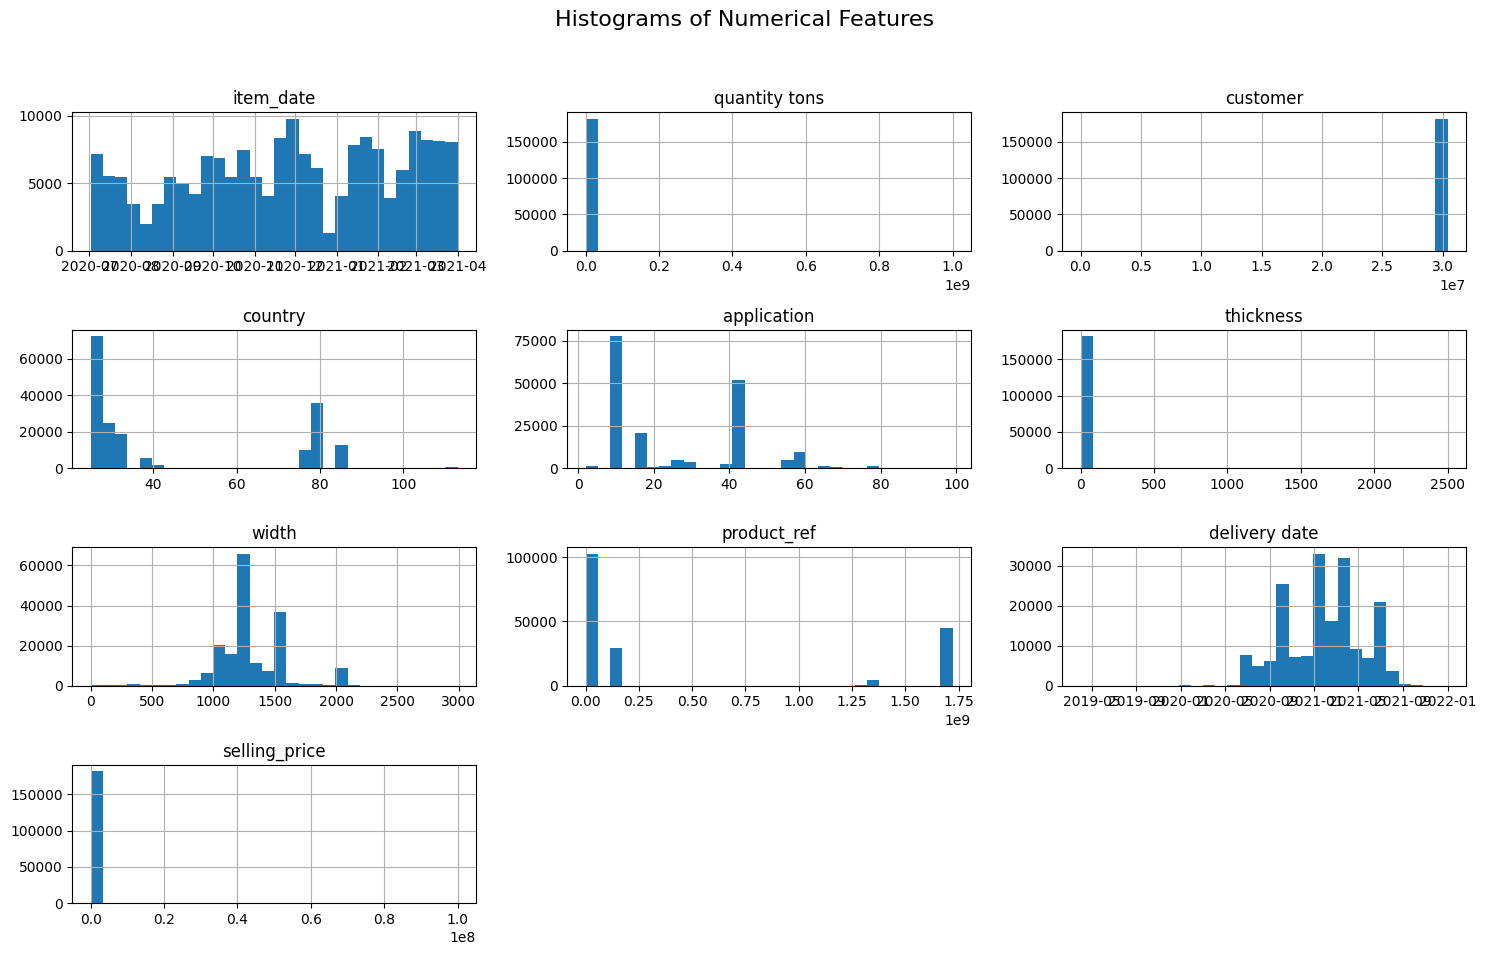

In [35]:
# Visualizations

# Histograms for numerical columns
data_cleaned.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

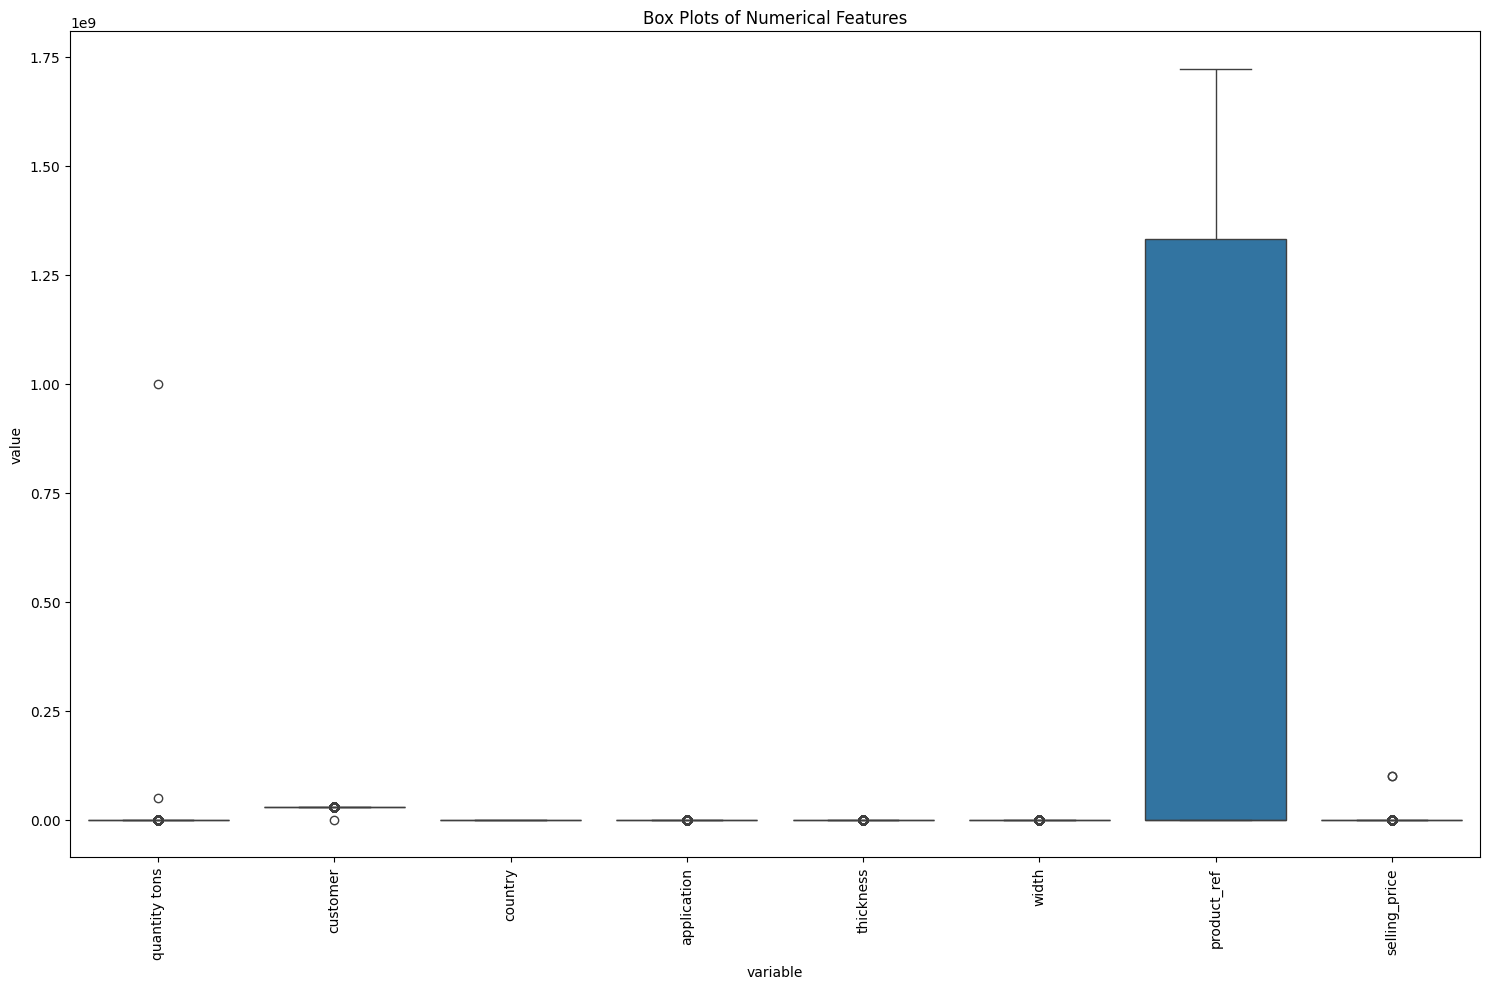

In [36]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_cleaned.select_dtypes(include=['float64', 'int64']).melt(), x="variable", y="value")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()

In [37]:
data_cleaned.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [38]:
# Select only numeric columns for correlation
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

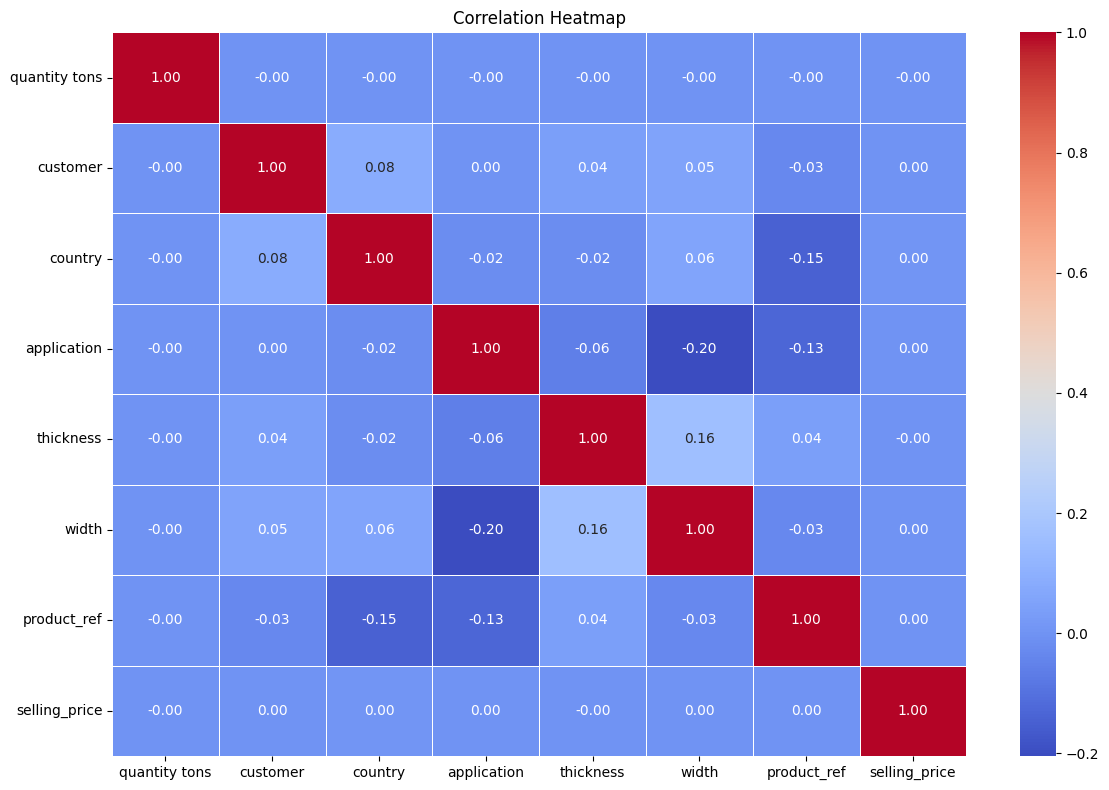

In [39]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [40]:
# Bar Plots for Categorical Columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns



In [41]:
categorical_columns

Index(['status', 'item type', 'material_ref'], dtype='object')

In [42]:
# for col in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=data_cleaned, y=col, order=data_cleaned[col].value_counts().index)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()
#     plt.show()


In [43]:
print('hi')

hi


C:\Users\venka\AppData\Local\Temp\ipykernel_16548\1607993111.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_cleaned.set_index('item_date').resample('M').size().plot()


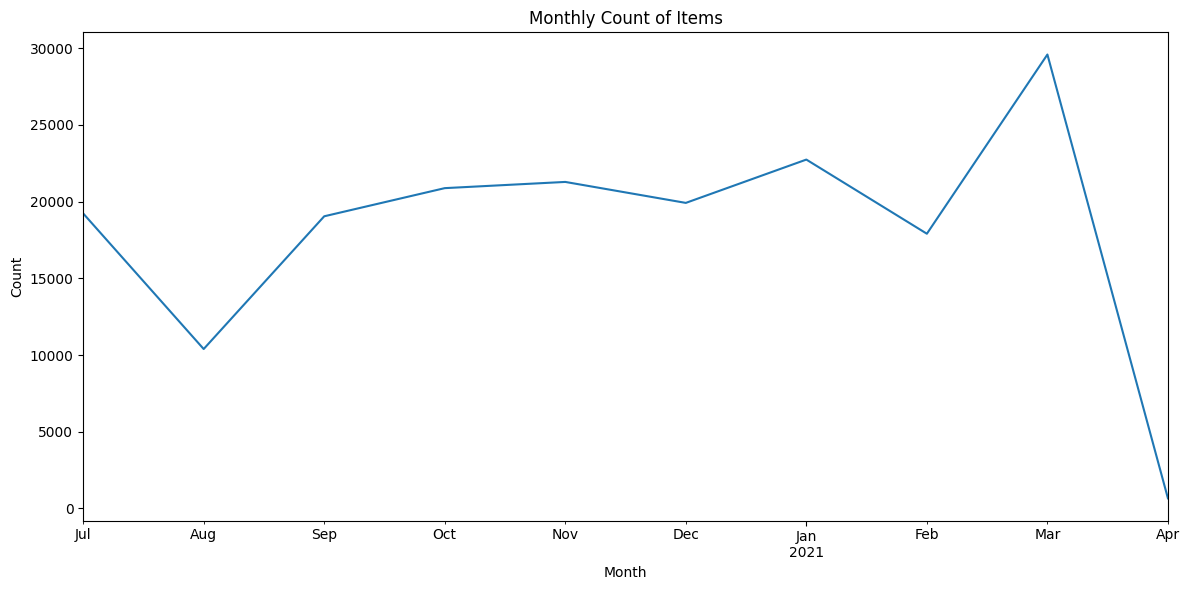

In [44]:
# Time Series Analysis (if applicable)
if 'item_date' in data_cleaned.columns:
    plt.figure(figsize=(12, 6))
    data_cleaned.set_index('item_date').resample('M').size().plot()
    plt.title('Monthly Count of Items')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
